In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "D:\\dataanalyse\\learning_materials\\Machine_learning\\ex1\\ex1data1.txt"
df =pd.read_csv(path,header=None,names=['Population','Profit'])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


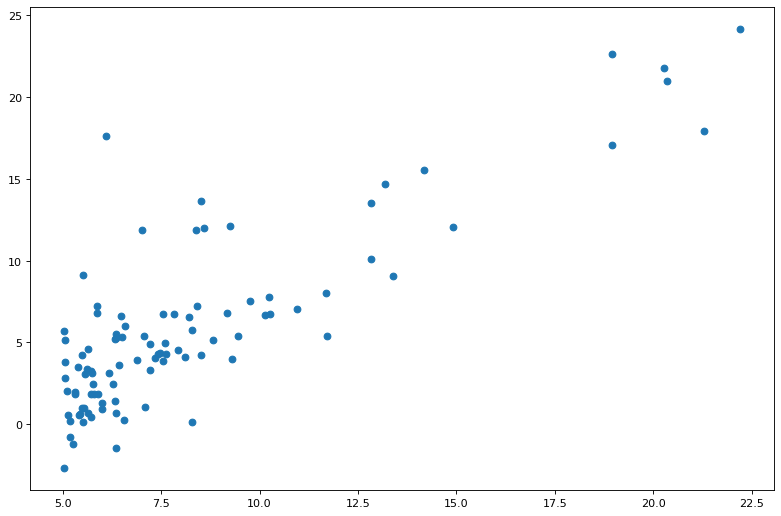

In [4]:
plt.figure(figsize=(12,8),dpi=80)
x=df['Population']
y=df['Profit']
plt.scatter(x,y)
plt.show()

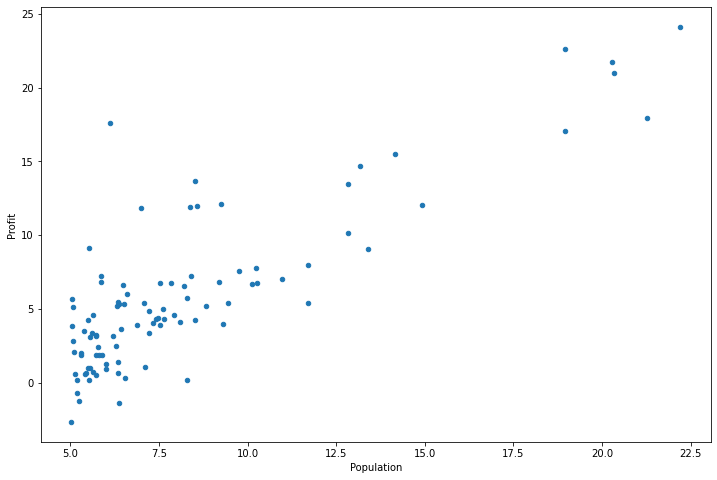

In [5]:
df.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

In [6]:
#创建成本函数
def computecost(X,y,theta):
    inner = np.power(((X*theta.T) - y),2)
    return np.sum(inner)/(2*len(X))   #因为dataframe结构，将其转置成为列向量

In [7]:
#在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。?
df.insert(0,'Ones',1)

In [8]:
df.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [9]:
#现在我们来做一些变量初始化。
clos = df.shape[1]    #看dataframe的列数，1表示 axis
print(clos)
X=df.iloc[:,0:clos-1]   #X是所有行去掉最后一列
y=df.iloc[:,clos-1:clos] #y是所有行，最后一列

3


In [10]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [11]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [12]:
#代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。
X=np.matrix(X.values)
y=np.matrix(y.values)
theta=np.matrix(np.array([0,0]))    #theta为啥是[[0,0]]

In [13]:
theta

matrix([[0, 0]])

In [14]:
X.shape,theta.shape,y.shape         # , 表示在同一行执行

((97, 2), (1, 2), (97, 1))

In [15]:
#计算代价函数 (theta初始值为0).
computecost(X, y, theta)    

32.072733877455676

In [16]:
#batch gradient decent（批量梯度下降）
def gradientDescent(X,y,theta,alpho,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j] - ((alpha/len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computecost(X,y,theta)
        
    return theta,cost

In [17]:
#初始化一些附加变量 - 学习速率α和要执行的迭代次数
alpha=0.01
iters=1000

In [18]:
#现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。
g,cost=gradientDescent(X,y,theta,alpha,iters)
print(g,cost)

[[-3.24140214  1.1272942 ]] [6.73719046 5.93159357 5.90115471 5.89522859 5.89009494 5.88500416
 5.87993248 5.87487909 5.86984391 5.86482687 5.85982789 5.85484692
 5.84988389 5.84493874 5.8400114  5.83510181 5.8302099  5.82533562
 5.82047889 5.81563965 5.81081784 5.8060134  5.80122627 5.79645638
 5.79170367 5.78696808 5.78224955 5.77754801 5.77286341 5.76819568
 5.76354477 5.75891061 5.75429313 5.7496923  5.74510803 5.74054027
 5.73598897 5.73145406 5.72693549 5.72243319 5.71794711 5.71347718
 5.70902336 5.70458558 5.70016379 5.69575792 5.69136792 5.68699373
 5.6826353  5.67829257 5.67396548 5.66965398 5.665358   5.6610775
 5.65681242 5.6525627  5.64832829 5.64410913 5.63990517 5.63571635
 5.63154261 5.62738391 5.6232402  5.6191114  5.61499748 5.61089837
 5.60681403 5.60274441 5.59868944 5.59464907 5.59062326 5.58661195
 5.58261509 5.57863263 5.57466451 5.57071068 5.56677109 5.5628457
 5.55893444 5.55503727 5.55115414 5.547285   5.54342979 5.53958847
 5.53576098 5.53194728 5.52814732 5.

In [19]:
#最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。
computecost(X,y,g)

4.515955503078914

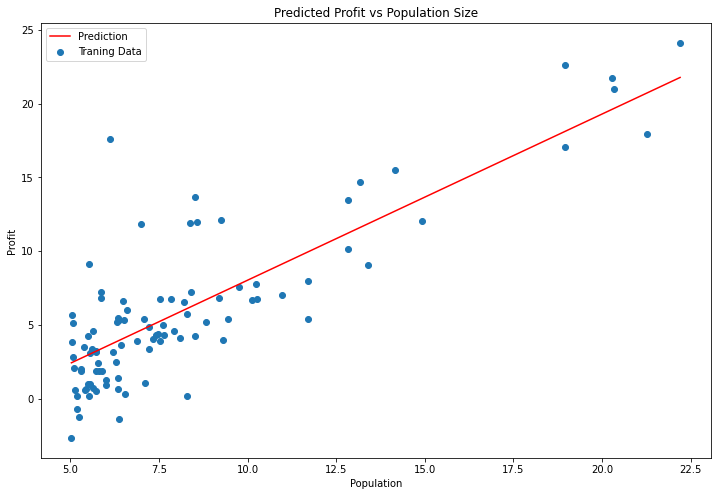

In [20]:
#现在我们来绘制线性模型以及数据，直观地看出它的拟合。
x = np.linspace(df["Population"].min(),df.Population.max(),100)  
f = g[0,0]+(g[0,1]*x)

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,"r",label="Prediction")
ax.scatter(df.Population,df.Profit,label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title("Predicted Profit vs Population Size")
plt.show()

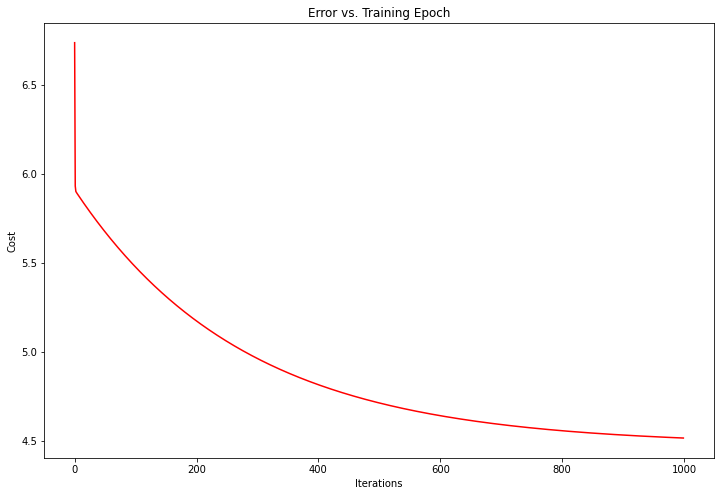

In [21]:
#由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [22]:
#多变量线性回归
#练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。
path =  'D:\\dataanalyse\\learning_materials\\Machine_learning\\ex1\\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [23]:
#数据的预处理
#添加了另一个预处理-特征归一化。
data2=(data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [24]:
#重复第1部分的预处理步骤，并对新数据集运行线性回归程序。
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computecost(X2, y2, g2)

0.13233290338631667

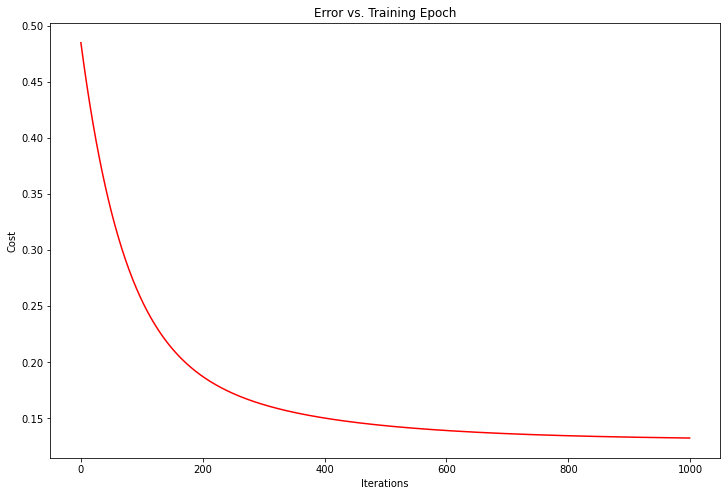

In [25]:
#查看训练的进程
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [26]:
#我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [27]:
model.score(X,y)

0.7020315537841397

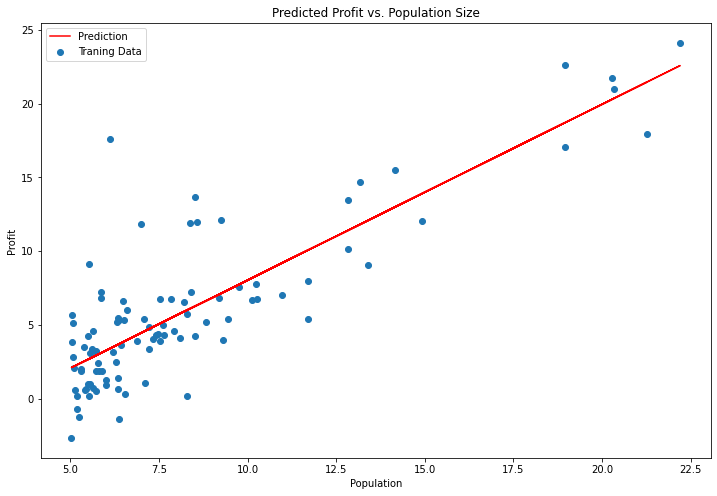

In [28]:
#scikit-learn model的预测表现
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.Population, df.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [12]:
#4. normal equation（正规方程）
# 正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。 上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

# 梯度下降与正规方程的比较：

# 梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型

# 正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [13]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

NameError: name 'X' is not defined

In [14]:
梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

NameError: name '梯度下降得到的结果是matrix' is not defined